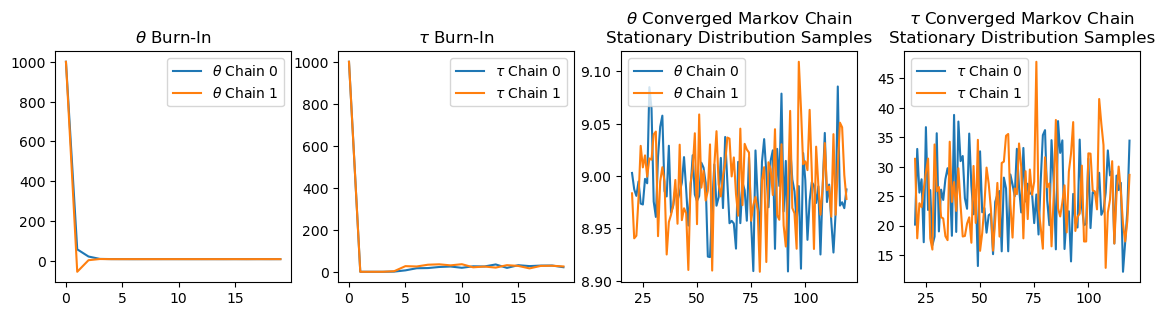

In [7]:
#Q1

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# loc is mean and scale is standard deviation

n = 30; m = 9; s = 0.2; x = stats.norm(loc=m, scale=s).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
tau[:,0] = 999
for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        tau[c,g] = stats.gamma(a = n/2 + 1, scale = 2/sum((x - theta[c, g - 1])**2)).rvs(1)#\
        theta[c,g] = stats.norm(x.mean(), 1/(n*tau[c,g])**0.5).rvs(1)#\
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20 #equilibriate algo for a few iterations
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();


theta estimate 0:  8.99401607872454
95% credible interval:  [8.91978761 9.06921544]
theta estimate 1:  8.99435862222024
95% credible interval:  [8.92000105 9.06831052]
SD estimate 0:  0.20304593171242408
95% credible interval:  [0.15855681 0.26263556]
SD estimate 1:  0.20285632042220078
95% credible interval:  [0.15885605 0.26334896]


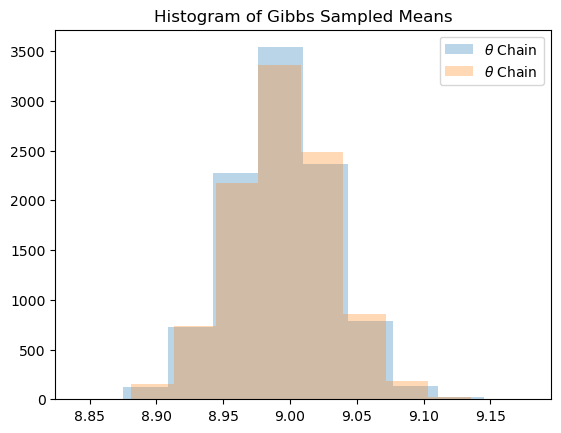

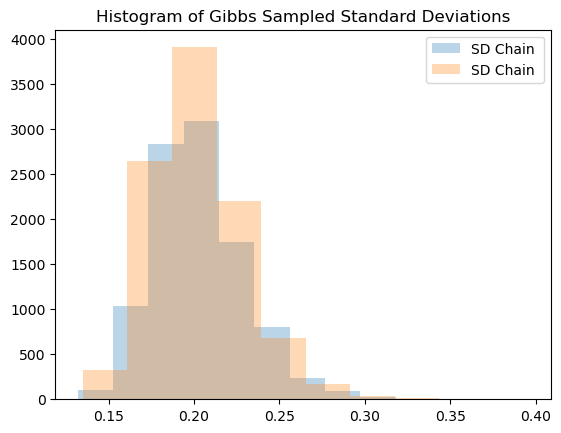

In [11]:
# use chain 0
plt.hist(theta[0,burn:], alpha = 0.3, label=("$\\theta$ Chain ",0))
print("theta estimate 0: ", theta[0,burn:].mean())
print("95% credible interval: ", np.quantile(theta[0,burn:], [0.025, 0.975]))

# use chain 1
plt.hist(theta[1,burn:], alpha = 0.3, label=("$\\theta$ Chain ",1))
print("theta estimate 1: ", theta[1,burn:].mean())
print("95% credible interval: ", np.quantile(theta[1,burn:], [0.025, 0.975]))
plt.title("Histogram of Gibbs Sampled Means")
plt.legend()
# use chain 0
plt.figure()
plt.hist(1/(tau[0,burn:])**0.5, alpha = 0.3, label=("SD Chain ", 0))
print("SD estimate 0: ", (1/(tau[0,burn:])**0.5).mean())
print("95% credible interval: ", np.quantile(1/(tau[0,burn:])**0.5, [0.025, 0.975]))

# use chain 1
plt.hist(1/(tau[1,burn:])**0.5, alpha = 0.3, label=("SD Chain ", 1))
print("SD estimate 1: ", (1/(tau[1,burn:])**0.5).mean())
print("95% credible interval: ", np.quantile(1/(tau[1,burn:])**0.5, [0.025, 0.975]))
plt.title("Histogram of Gibbs Sampled Standard Deviations")
plt.legend()

## Q2:
$ p(\theta) \propto e^{-\frac{\tau_0}{2}(\theta - \theta_0)^2}$\
$ p(\tau) \propto \tau^{\frac{\alpha}{2} - 1}e^{-\frac{\lambda}{2}\tau}$\
Assume $p(x|\theta, \tau) \propto \Pi^{n}_{i = 1}{\sqrt{\tau}e^{-\frac{\tau}{2}(x_i - \theta)^2}} =\tau^{\frac{n}{2}} e^{-\frac{\tau}{2}\Sigma_{i=1}^n(\theta - x_i)^2}$\
Then $p(\theta, \tau, x) = p(x|\theta, \tau)p(\theta)p(\tau) \propto \tau^{\frac{n}{2}}e^{-\frac{\tau}{2}\Sigma_{i=1}^n(\theta - x_i)^2}e^{-\frac{\tau_0}{2}(\theta - \theta_0)^2}\tau^{\frac{\alpha}{2} - 1}e^{-\frac{\lambda}{2}\tau}$\
Focusing on $\theta$: $p(\theta|x, \tau) \propto e^{-\frac{n\tau + \tau_0}{2}(\theta - \frac{n\bar{x}\tau + \theta_0\tau_0}{n\tau + \tau_0})^2} \sim N(\frac{n\bar{x}\tau + \theta_0\tau_0}{n\tau + \tau_0}, n\tau + \tau_0)$\
Focusing on $\tau$: $p(\tau|x, \theta) \propto \tau^{\frac{\alpha + n}{2} - 1}e^{-\frac{\tau}{2}(\Sigma_{i=1}^n(\theta - x_i)^2 + \lambda)} \sim Gamma(\frac{\alpha+n}{2}, \frac{\Sigma_{i=1}^n(\theta - x_i)^2 + \lambda}{2})$, which has mean $\frac{\alpha+n}{\Sigma_{i=1}^n(\theta - x_i)^2 + \lambda}$, and variance $\frac{\alpha+n}{(\Sigma_{i=1}^n(\theta - x_i)^2 + \lambda)^2}$\
In class, we discussed how $\tau$ scales the influentiality every observation of $x$. So when we have $n$ observations of $x$, the prior contributes $\frac{\tau_0}{\tau}$ observations of $\theta_0$.\
Now $\alpha$ and $\lambda$ influence the nature of $\tau$. From the formula for the mean of a Gamma distribution ($\frac{\alpha'}{\lambda'}$), we see that a higher $\alpha$ increases our estimated precision, $\tau$, while a higher $\lambda$ decreases our estimated precision. As well, from the formula for the variance of a Gamma distribution ($\frac{\alpha'}{\lambda'^2}$), we see that a higher $\alpha$ increases the variance of our precision estimate, while a higher $\lambda$ heavily decreases the variance of our precision estimate. Once we observe data, the posterior distributions of $\tau$ have a mean and variance inversely proportional to how close our estimated mean, $\theta$, is to the mean of the observed data ($\Sigma_{i=1}^n(\theta - x_i)^2$). This roughly means when our estimated mean is close to the data's mean, we get a high estimated precision that is unstable (i.e. higher variance).\
So generally, when we have $n$ observations of $x$, the prior contributes fewer observations of $\theta_0$ for high $\alpha$ and more observations for high $\lambda$. 

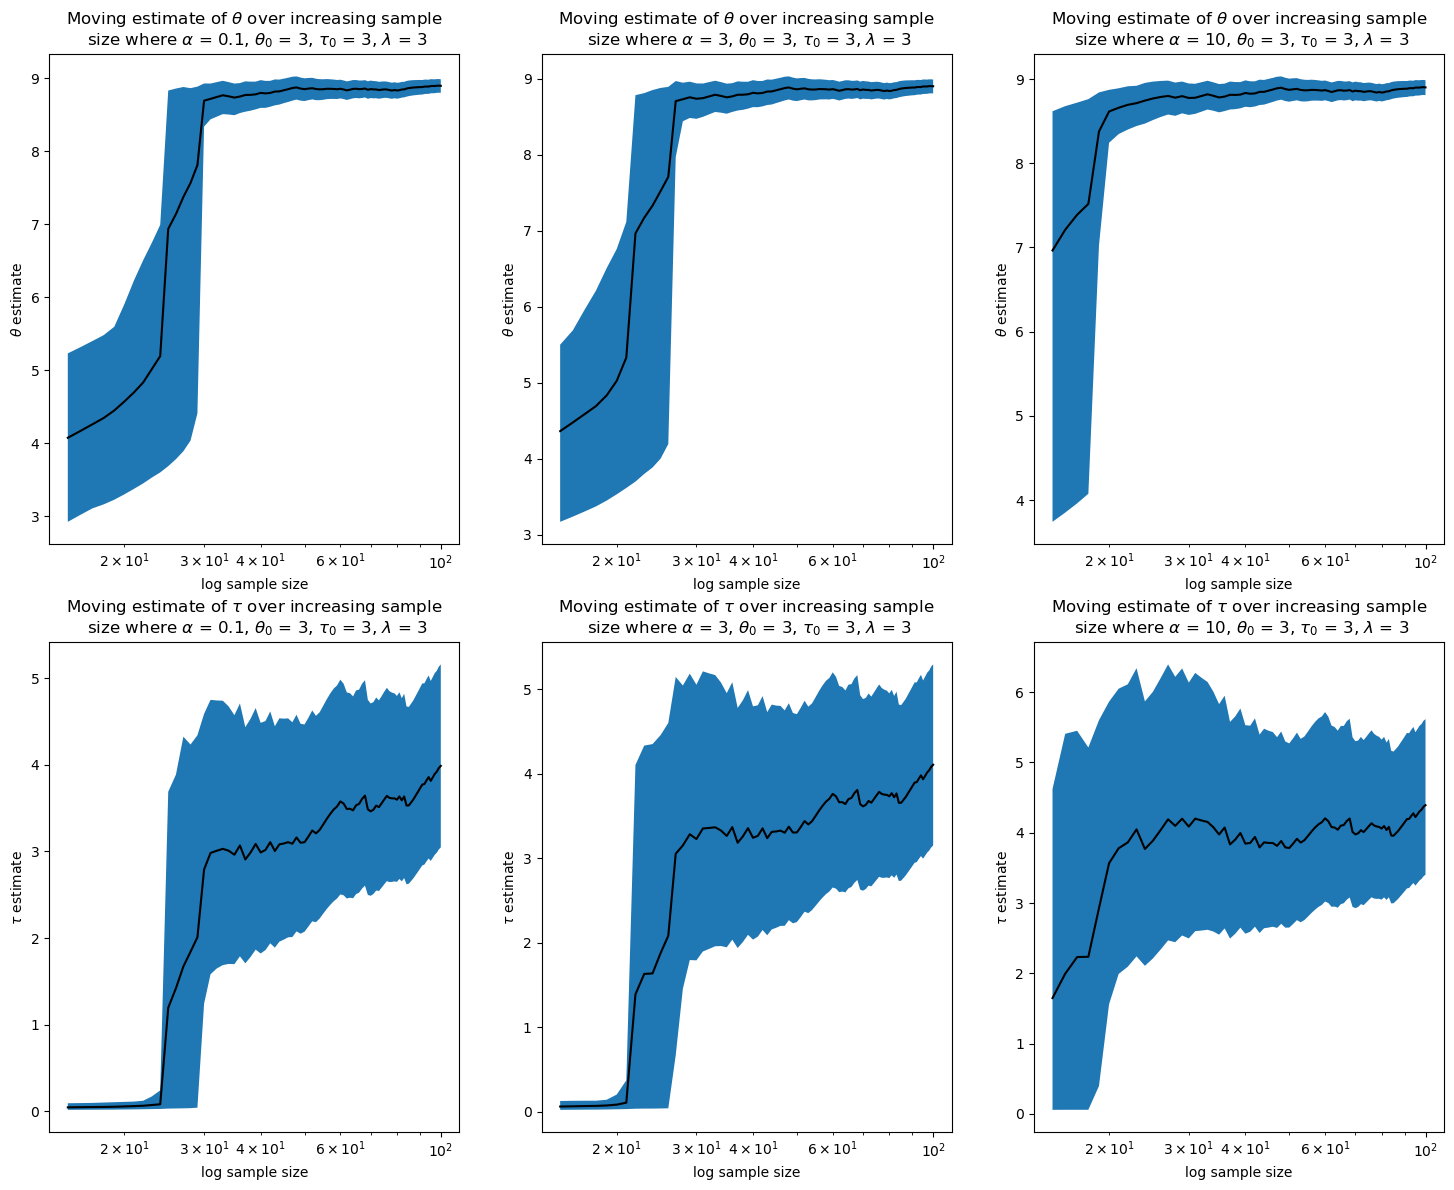

In [24]:
# Q2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# loc is mean and scale is standard deviation

max_size = 100
m = 9; s = 0.5; x = stats.norm(loc=m, scale=s).rvs(size=max_size) 
alphas = [0.1, 3, 10]; ldas = [0.1, 3, 10]
theta0s = [0.1, 3, 10]; tau0s = [0.1, 3, 10]
C,G = 1,100  # chains, Gibbs samples
def GibbsSample(n, alpha = alphas[1], lda = ldas[1], theta0 = theta0s[1], tau0 = tau0s[1], C = C, G = G, m = m, s = s, x_t = x):
    np.random.seed(365)
    x = x_t[:n]
    theta,tau = np.zeros([C,G]),np.zeros([C,G])
    for c in range(C):
        for g in range(1,G):
            # https://en.wikipedia.org/wiki/Gamma_distribution
            tau[c,g] = stats.gamma(a = (n+alpha)/2, scale = 2/(lda + sum((theta[c, g - 1] - x)**2))).rvs(1)#\
            theta[c,g] = stats.norm((sum(x)*tau[c,g]+theta0*tau0)/(n*tau[c,g] + tau0), 1/(n*tau[c,g] +tau0)**0.5).rvs(1)#\
    return theta, tau
burn = 15
thas, tus = np.zeros([len(alphas),max_size]), np.zeros([len(alphas),max_size])
tha_CI = np.zeros([len(alphas),max_size], dtype=object)
tu_CI = np.zeros([len(alphas),max_size], dtype=object)
for a in range(len(alphas)):
    for n in range(0, max_size): 
        samp_tha, samp_tu = GibbsSample(n+1, alpha = alphas[a])
        thas[a, n] = samp_tha[0,burn:].mean()
        tus[a, n] = samp_tu[0,burn:].mean()
        tha_CI[a, n] = tuple(np.quantile(samp_tha[0,burn:], [0.025, 0.975]))
        tu_CI[a, n] = tuple(np.quantile(samp_tu[0,burn:], [0.025, 0.975]))

fig,ax = plt.subplots(2, 3, figsize=(18,14)); 
ax[0,0].set_title(("Moving estimate of $\\theta$ over increasing sample\n size where $\\alpha$ = " + str(alphas[0]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\lambda$ = "+str(ldas[1])))
ax[0,1].set_title(("Moving estimate of $\\theta$ over increasing sample\n size where $\\alpha$ = " + str(alphas[1]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\lambda$ = "+str(ldas[1])))
ax[0,2].set_title(("Moving estimate of $\\theta$ over increasing sample\n size where $\\alpha$ = " + str(alphas[2]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\lambda$ = "+str(ldas[1])))
ax[1,0].set_title(("Moving estimate of $\\tau$ over increasing sample\n size where $\\alpha$ = " + str(alphas[0]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\lambda$ = "+str(ldas[1])))
ax[1,1].set_title(("Moving estimate of $\\tau$ over increasing sample\n size where $\\alpha$ = " + str(alphas[1]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\lambda$ = "+str(ldas[1])))
ax[1,2].set_title(("Moving estimate of $\\tau$ over increasing sample\n size where $\\alpha$ = " + str(alphas[2]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\lambda$ = "+str(ldas[1])))
for c in range(3):
    ax[0, c].plot(range(burn,max_size+1), thas[c,burn-1:], 'k-')
    lowerCI = [x[0] for x in tha_CI[c,burn-1:]]
    upperCI = [x[1] for x in tha_CI[c,burn-1:]]
    ax[0, c].fill_between(range(burn,max_size+1), lowerCI, upperCI)  
    ax[0, c].set_xlabel("log sample size")
    ax[0, c].set_ylabel("$\\theta$ estimate")
    ax[0,c].set_xscale('log')
for c in range(3):
    ax[1, c].plot(range(burn,max_size+1), tus[c,burn-1:], 'k-')
    lowerCI = [x[0] for x in tu_CI[c,burn-1:]]
    upperCI = [x[1] for x in tu_CI[c,burn-1:]]
    ax[1, c].fill_between(range(burn,max_size+1), lowerCI, upperCI) 
    ax[1, c].set_xlabel("log sample size")
    ax[1, c].set_ylabel("$\\tau$ estimate")
    ax[1,c].set_xscale('log')
            

Higher $\alpha$ seems to help us estimate $\theta$ quicker in the begining (i.e. smaller sample sizes) by giving us a higher starting precision estimate, thereby giving more weight to the observed data.

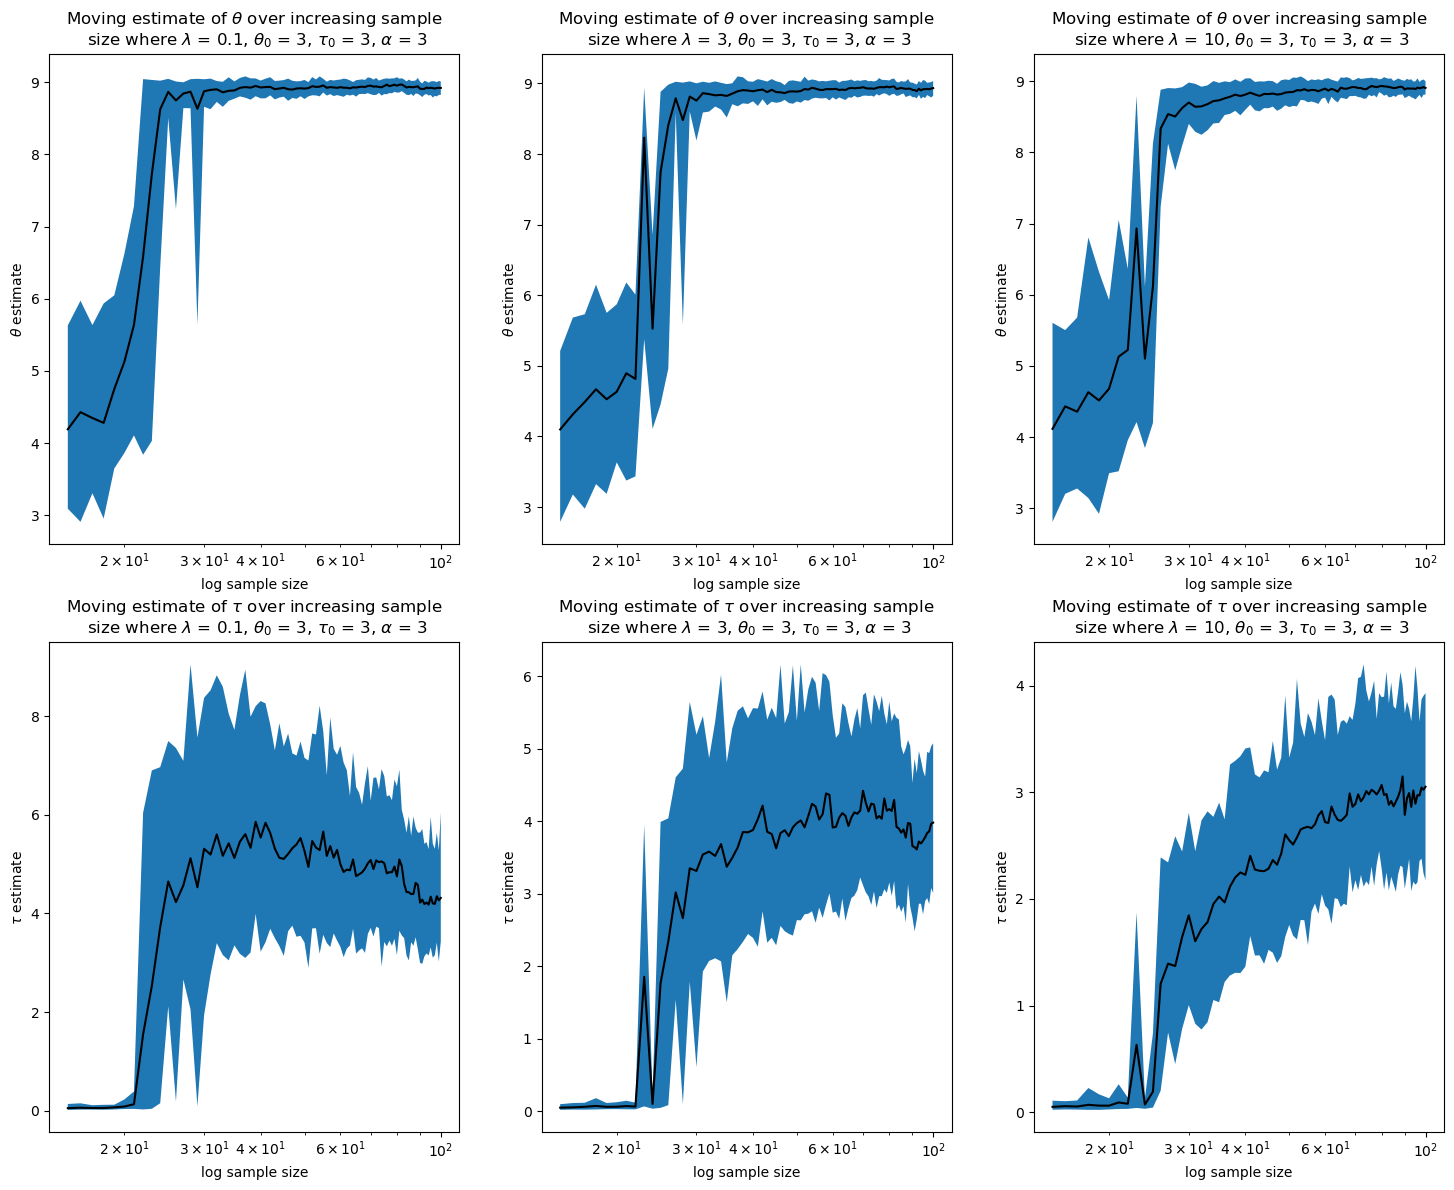

In [21]:
thas, tus = np.zeros([len(ldas),max_size]), np.zeros([len(ldas),max_size])
tha_CI = np.zeros([len(ldas),max_size], dtype=object)
tu_CI = np.zeros([len(ldas),max_size], dtype=object)
for a in range(len(ldas)):
    for n in range(0, max_size): 
        samp_tha, samp_tu = GibbsSample(n+1, lda = ldas[a])
        thas[a, n] = samp_tha[0,burn:].mean()
        tus[a, n] = samp_tu[0,burn:].mean()
        tha_CI[a, n] = tuple(np.quantile(samp_tha[0,burn:], [0.025, 0.975]))
        tu_CI[a, n] = tuple(np.quantile(samp_tu[0,burn:], [0.025, 0.975]))

fig,ax = plt.subplots(2, 3, figsize=(18,14)); 
ax[0,0].set_title(("Moving estimate of $\\theta$ over increasing sample\n size where $\\lambda$ = " + str(ldas[0]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\alpha$ = "+str(alphas[1])))
ax[0,1].set_title(("Moving estimate of $\\theta$ over increasing sample\n size where $\\lambda$ = " + str(ldas[1]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\alpha$ = "+str(alphas[1])))
ax[0,2].set_title(("Moving estimate of $\\theta$ over increasing sample\n size where $\\lambda$ = " + str(ldas[2]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\alpha$ = "+str(alphas[1])))
ax[1,0].set_title(("Moving estimate of $\\tau$ over increasing sample\n size where $\\lambda$ = " + str(ldas[0]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\alpha$ = "+str(alphas[1])))
ax[1,1].set_title(("Moving estimate of $\\tau$ over increasing sample\n size where $\\lambda$ = " + str(ldas[1]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\alpha$ = "+str(alphas[1])))
ax[1,2].set_title(("Moving estimate of $\\tau$ over increasing sample\n size where $\\lambda$ = " + str(ldas[2]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\alpha$ = "+str(alphas[1])))
for c in range(3):
    ax[0, c].plot(range(burn,max_size+1), thas[c,burn-1:], 'k-')
    lowerCI = [x[0] for x in tha_CI[c,burn-1:]]
    upperCI = [x[1] for x in tha_CI[c,burn-1:]]
    ax[0, c].fill_between(range(burn,max_size+1), lowerCI, upperCI)  
    ax[0, c].set_xlabel("log sample size")
    ax[0, c].set_ylabel("$\\theta$ estimate")
    ax[0,c].set_xscale('log')
for c in range(3):
    ax[1, c].plot(range(burn,max_size+1), tus[c,burn-1:], 'k-')
    lowerCI = [x[0] for x in tu_CI[c,burn-1:]]
    upperCI = [x[1] for x in tu_CI[c,burn-1:]]
    ax[1, c].fill_between(range(burn,max_size+1), lowerCI, upperCI) 
    ax[1, c].set_xlabel("log sample size")
    ax[1, c].set_ylabel("$\\tau$ estimate")
    ax[1,c].set_xscale('log')

Higher $\lambda$ gives us lower precision estimates in the begining, making our $\theta$ estimates more erratic initally.

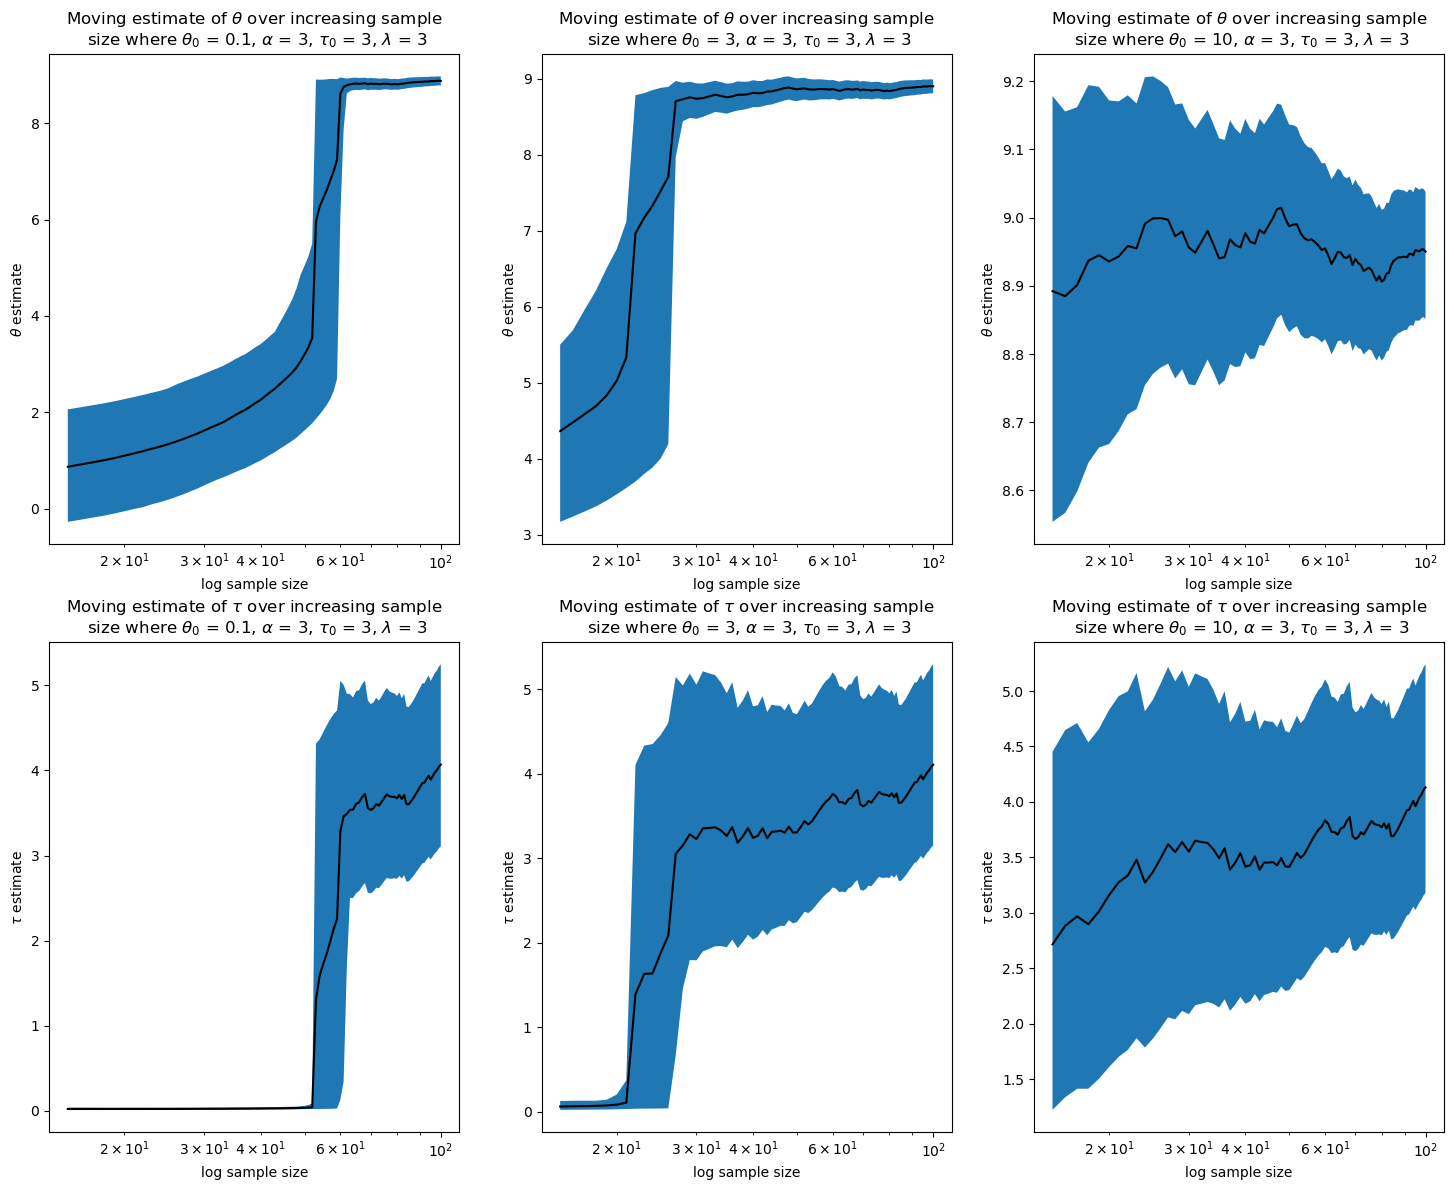

In [25]:
thas, tus = np.zeros([len(theta0s),max_size]), np.zeros([len(theta0s),max_size])
tha_CI = np.zeros([len(theta0s),max_size], dtype=object)
tu_CI = np.zeros([len(theta0s),max_size], dtype=object)
for a in range(len(theta0s)):
    for n in range(0, max_size): 
        samp_tha, samp_tu = GibbsSample(n+1, theta0 = theta0s[a])
        thas[a, n] = samp_tha[0,burn:].mean()
        tus[a, n] = samp_tu[0,burn:].mean()
        tha_CI[a, n] = tuple(np.quantile(samp_tha[0,burn:], [0.025, 0.975]))
        tu_CI[a, n] = tuple(np.quantile(samp_tu[0,burn:], [0.025, 0.975]))

fig,ax = plt.subplots(2, 3, figsize=(18,14)); 
ax[0,0].set_title(("Moving estimate of $\\theta$ over increasing sample\n size where $\\theta_0$ = " + str(theta0s[0]) +", $\\alpha$ = "+ str(alphas[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\lambda$ = "+str(ldas[1])))
ax[0,1].set_title(("Moving estimate of $\\theta$ over increasing sample\n size where $\\theta_0$ = " + str(theta0s[1]) +", $\\alpha$ = "+ str(alphas[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\lambda$ = "+str(ldas[1])))
ax[0,2].set_title(("Moving estimate of $\\theta$ over increasing sample\n size where $\\theta_0$ = " + str(theta0s[2]) +", $\\alpha$ = "+ str(alphas[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\lambda$ = "+str(ldas[1])))
ax[1,0].set_title(("Moving estimate of $\\tau$ over increasing sample\n size where $\\theta_0$ = " + str(theta0s[0]) +", $\\alpha$ = "+ str(alphas[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\lambda$ = "+str(ldas[1])))
ax[1,1].set_title(("Moving estimate of $\\tau$ over increasing sample\n size where $\\theta_0$ = " + str(theta0s[1]) +", $\\alpha$ = "+ str(alphas[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\lambda$ = "+str(ldas[1])))
ax[1,2].set_title(("Moving estimate of $\\tau$ over increasing sample\n size where $\\theta_0$ = " + str(theta0s[2]) +", $\\alpha$ = "+ str(alphas[1]) +", $\\tau_0$ = "+ str(tau0s[1])+", $\\lambda$ = "+str(ldas[1])))
for c in range(3):
    ax[0, c].plot(range(burn,max_size+1), thas[c,burn-1:], 'k-')
    lowerCI = [x[0] for x in tha_CI[c,burn-1:]]
    upperCI = [x[1] for x in tha_CI[c,burn-1:]]
    ax[0, c].fill_between(range(burn,max_size+1), lowerCI, upperCI)  
    ax[0, c].set_xlabel("log sample size")
    ax[0, c].set_ylabel("$\\theta$ estimate")
    ax[0,c].set_xscale('log')
for c in range(3):
    ax[1, c].plot(range(burn,max_size+1), tus[c,burn-1:], 'k-')
    lowerCI = [x[0] for x in tu_CI[c,burn-1:]]
    upperCI = [x[1] for x in tu_CI[c,burn-1:]]
    ax[1, c].fill_between(range(burn,max_size+1), lowerCI, upperCI) 
    ax[1, c].set_xlabel("log sample size")
    ax[1, c].set_ylabel("$\\tau$ estimate")
    ax[1,c].set_xscale('log')
            

$\theta_0$ closer to our set value of $\theta$ gives us smaller credible intervals for $\theta$ initially. It also gives us extremely poor $\tau$ estimates for small sample sizes.

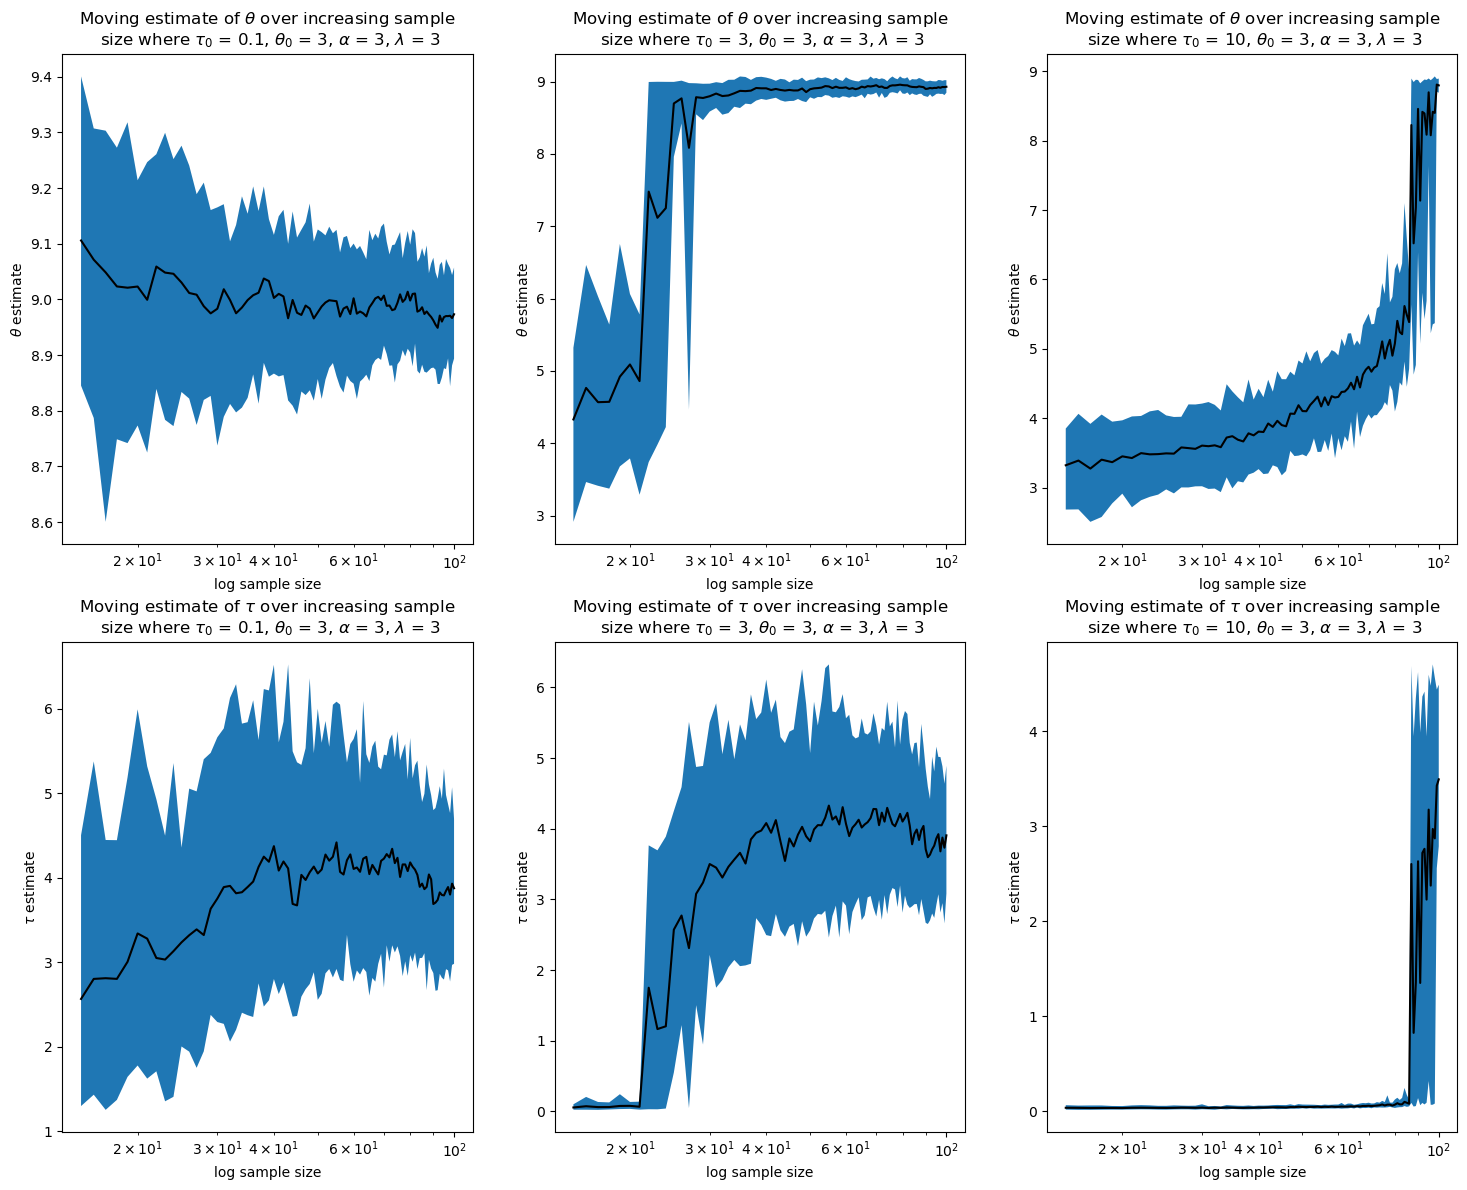

In [23]:
thas, tus = np.zeros([len(tau0s),max_size]), np.zeros([len(tau0s),max_size])
tha_CI = np.zeros([len(tau0s),max_size], dtype=object)
tu_CI = np.zeros([len(tau0s),max_size], dtype=object)
for a in range(len(tau0s)):
    for n in range(0, max_size): 
        samp_tha, samp_tu = GibbsSample(n+1, tau0 = tau0s[a])
        thas[a, n] = samp_tha[0,burn:].mean()
        tus[a, n] = samp_tu[0,burn:].mean()
        tha_CI[a, n] = tuple(np.quantile(samp_tha[0,burn:], [0.025, 0.975]))
        tu_CI[a, n] = tuple(np.quantile(samp_tu[0,burn:], [0.025, 0.975]))

fig,ax = plt.subplots(2, 3, figsize=(18,14)); 
ax[0,0].set_title(("Moving estimate of $\\theta$ over increasing sample\n size where $\\tau_0$ = " + str(tau0s[0]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\alpha$ = "+ str(alphas[1])+", $\\lambda$ = "+str(ldas[1])))
ax[0,1].set_title(("Moving estimate of $\\theta$ over increasing sample\n size where $\\tau_0$ = " + str(tau0s[1]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\alpha$ = "+ str(alphas[1])+", $\\lambda$ = "+str(ldas[1])))
ax[0,2].set_title(("Moving estimate of $\\theta$ over increasing sample\n size where $\\tau_0$ = " + str(tau0s[2]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\alpha$ = "+ str(alphas[1])+", $\\lambda$ = "+str(ldas[1])))
ax[1,0].set_title(("Moving estimate of $\\tau$ over increasing sample\n size where $\\tau_0$ = " + str(tau0s[0]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\alpha$ = "+ str(alphas[1])+", $\\lambda$ = "+str(ldas[1])))
ax[1,1].set_title(("Moving estimate of $\\tau$ over increasing sample\n size where $\\tau_0$ = " + str(tau0s[1]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\alpha$ = "+ str(alphas[1])+", $\\lambda$ = "+str(ldas[1])))
ax[1,2].set_title(("Moving estimate of $\\tau$ over increasing sample\n size where $\\tau_0$ = " + str(tau0s[2]) +", $\\theta_0$ = "+ str(theta0s[1]) +", $\\alpha$ = "+ str(alphas[1])+", $\\lambda$ = "+str(ldas[1])))
for c in range(3):
    ax[0, c].plot(range(burn,max_size+1), thas[c,burn-1:], 'k-')
    lowerCI = [x[0] for x in tha_CI[c,burn-1:]]
    upperCI = [x[1] for x in tha_CI[c,burn-1:]]
    ax[0, c].fill_between(range(burn,max_size+1), lowerCI, upperCI)  
    ax[0, c].set_xlabel("log sample size")
    ax[0, c].set_ylabel("$\\theta$ estimate")
    ax[0,c].set_xscale('log')
for c in range(3):
    ax[1, c].plot(range(burn,max_size+1), tus[c,burn-1:], 'k-')
    lowerCI = [x[0] for x in tu_CI[c,burn-1:]]
    upperCI = [x[1] for x in tu_CI[c,burn-1:]]
    ax[1, c].fill_between(range(burn,max_size+1), lowerCI, upperCI) 
    ax[1, c].set_xlabel("log sample size")
    ax[1, c].set_ylabel("$\\tau$ estimate")
    ax[1,c].set_xscale('log')
            

High $\tau_0$ requires large number of samples to estimate $\theta$ well. Small $\tau_0$ gives us more stable estimates of $\theta$ and $\tau$.

#### Q3 (option B):

Assume we have some proper prior $p(\theta)$ and a likelihood $p(x|\theta)$.\
Then $p(\theta)p(x|\theta) = p(x,\theta) = p(x)p(\theta|x)$. And, well, $p(\theta|x)$ is our posterior. Since our data, $x$, is known, $p(x)$ is just a constant. So we can say $p(\theta|x) \propto p(x,\theta)$, as desired.\
The posterior is also proper since:\
$p(\theta|x) = \frac{p(x,\theta)}{p(x)} \implies \int p(\theta|x) d\theta = \int \frac{p(x,\theta)}{p(x)} d\theta$\
$= \frac{p(x)}{p(x)} = 1$, since $p(\theta)$ is proper.\
Therefore, $p(\theta)$ is proper $\implies p(\theta|x)$ is proper.\
We can also determine the distribution of the posterior from the joint by focusing on the functional terms related to our random variable of interest. Question 2 is a good example of this where we have a joint: $p(\theta, \tau, x) = p(x|\theta, \tau)p(\theta)p(\tau) \propto \tau^{\frac{n}{2}}e^{-\frac{\tau}{2}\Sigma_{i=1}^n(\theta - x_i)^2}e^{-\frac{\tau_0}{2}(\theta - \theta_0)^2}\tau^{\frac{\alpha}{2} - 1}e^{-\frac{\lambda}{2}\tau}$\
And focusing on $\theta$ gives us: $p(\theta|x, \tau) \propto e^{-\frac{n\tau + \tau_0}{2}(\theta - \frac{n\bar{x}\tau + \theta_0\tau_0}{n\tau + \tau_0})^2} \sim N(\frac{n\bar{x}\tau + \theta_0\tau_0}{n\tau + \tau_0}, n\tau + \tau_0)$\
While focusing on $\tau$ gives us: $p(\tau|x, \theta) \propto \tau^{\frac{\alpha + n}{2} - 1}e^{-\frac{\tau}{2}(\Sigma_{i=1}^n(\theta - x_i)^2 + \lambda)} \sim Gamma(\frac{\alpha+n}{2}, \frac{\Sigma_{i=1}^n(\theta - x_i)^2 + \lambda}{2})$
While these derivations are fun, the interesting part of the Bayesian perspective is its ability to forgo any functional forms of distributions and rely on data. Consider the following example:


Actual frequency of ones:  0.43333333333333335
Our most informed estimated frequency of ones:  0.3333333333333333
95% Credible Interval:  [0.  0.5]


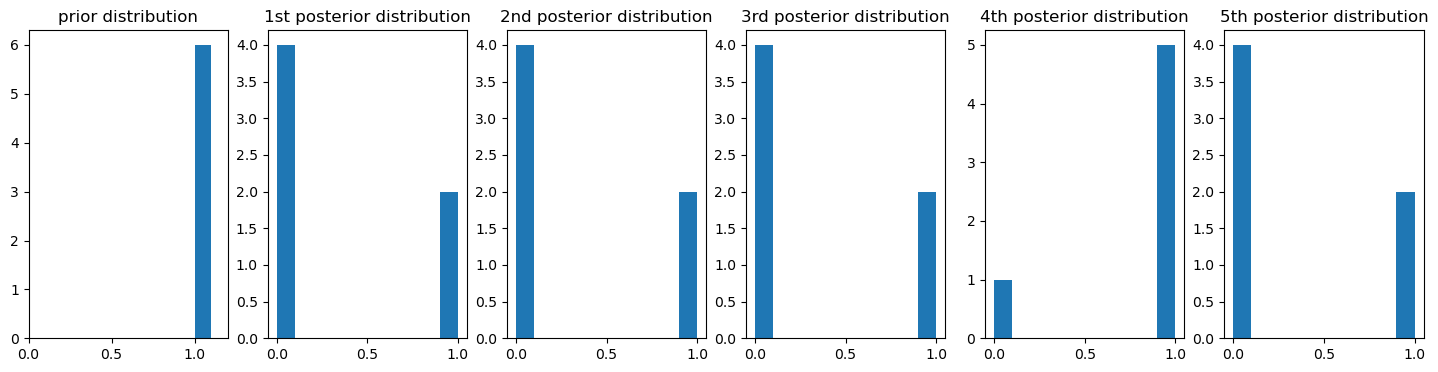

In [31]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 6, figsize=(18,4))

prior = np.array([1,1, 1, 1, 1, 1])
ax[0].set_title("prior distribution")
ax[0].hist(prior)
ax[0].set_xlim(xmin=0, xmax = 1.2)

data1 = np.array([0, 0, 1, 0, 0, 1])
posterior1 = prior*data1
ax[1].set_title("1st posterior distribution")
ax[1].hist(posterior1)

data2 = np.array([1, 1, 0, 0, 0, 0])
posterior2 = prior*data2
ax[2].set_title("2nd posterior distribution")
ax[2].hist(posterior2)

data3 = np.array([0, 0, 0, 1, 0, 1])
posterior3 = prior*data3
ax[3].set_title("3rd posterior distribution")
ax[3].hist(posterior3)

data4 = np.array([1, 0, 1, 1, 1, 1])
posterior4 = prior*data4
ax[4].set_title("4th posterior distribution")
ax[4].hist(posterior4)

data5 = np.array([0, 0, 1, 1, 0, 0])
posterior5 = prior*data5
ax[5].set_title("5th posterior distribution")
ax[5].hist(posterior5)

actual_freq_ones = sum(data1 + data2 + data3 + data4 + data5)/30
most_informed_est_freq_ones = sum(posterior5)/len(posterior5)

print("Actual frequency of ones: ", actual_freq_ones)
print("Our most informed estimated frequency of ones: ", most_informed_est_freq_ones)
print("95% Credible Interval: ", np.quantile(posterior5/sum(posterior5), [0.025, 0.975]))

This Bayesian procedure about estimating the frequency of one's (or heads) we get from flipping a coin, let's say, can be done without caring about functional distributions or "from scipy import stats". While the estimates and credible interval produced are a bit sketchy, doing this process on data vectors with 50 entries instead of 6 and/or repeating this 30 times instead of 5 should give us much better estimates. And the data (not function) oriented nature of this procedure is what makes it Bayesian.